#### Buy Journey
1. 고객 입장, 랜딩 페이지 접근
2. 상품을 보여줌
3. 상품을 선택
4. 상세 페이지로 이동(hop) -> Item-Based 가능
5. 관심있는 상품을 장바구니에 담음
6. 결제 페이지로 이동 -> Cross/Up/Down 가능
7. 결제 실행

1. 보는 고객이 엄청 많다(관심도? 유사도?)
2. 링크를 무엇으로 설정할 것인가?
3. 아이템 - 유저 - 뷰 숫자?   : 관심도가 높은 상품
4. 아이템 - 유저 - 카트  : 사려고 고민하는 상품들
5. 판매율 : 결제 / 뷰    
6. 찜 비율 : 카트 - 결제 / 뷰

In [1]:
import pandas as pd
from datetime import datetime

In [69]:
df= pd.read_csv('test6.csv')
df.sort_values('timestamp') # 시간 순이 아니다. 재정렬
df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [3]:
def timestemp_to_year(timestamp) :
    second_timestamp = timestamp / 1000
    dt_object = datetime.fromtimestamp(second_timestamp)
    return dt_object.year
def timestemp_to_month(timestamp) :
    second_timestamp = timestamp / 1000
    dt_object = datetime.fromtimestamp(second_timestamp)
    return dt_object.month
def timestemp_to_day(timestamp) :
    second_timestamp = timestamp / 1000
    dt_object = datetime.fromtimestamp(second_timestamp)
    return dt_object.day
def timestemp_to_hour(timestamp) :
    second_timestamp = timestamp / 1000
    dt_object = datetime.fromtimestamp(second_timestamp)
    return dt_object.hour

In [4]:
df['year'] = df['timestamp'].apply(lambda x : timestemp_to_year(x))
df['month'] = df['timestamp'].apply(lambda x : timestemp_to_month(x))
df['day'] = df['timestamp'].apply(lambda x : timestemp_to_day(x))
df['hour'] = df['timestamp'].apply(lambda x : timestemp_to_hour(x))

In [5]:
df = df[['year', 'month', 'day', 'hour','visitorid', 'event', 'itemid','transactionid']]

In [71]:
df['count'] = 1

In [7]:
set(df['event'])

{'addtocart', 'transaction', 'view'}

In [8]:
user_c = df.groupby('visitorid').agg({'count':'sum'}).sort_values('count', ascending=False).reset_index()
user_c

,visitorid,count
0,1150086,7757
1,530559,4328
2,152963,3024
3,895999,2474
4,163561,2410
...,...,...
1407575,714158,1
1407576,714159,1
1407577,714160,1
1407578,714162,1


<Axes: >

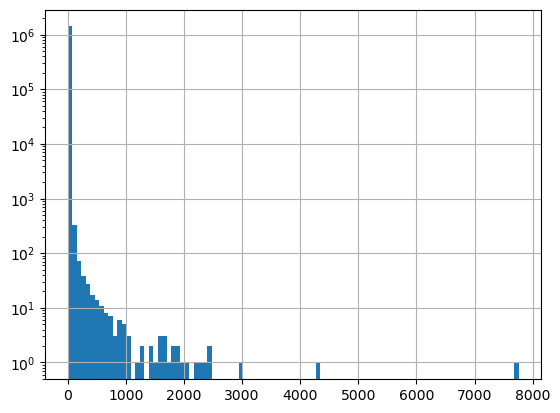

In [59]:
user_c['count'].hist(bins=100, log=True)

In [143]:
actual_u = set(user_c[user_c['count'] >= 2]['visitorid']) # 실제로 사용하는 유저들 상품검색활동이 10회 이상.

In [144]:
len(actual_u)

406020

In [145]:
uf_df = df[df['visitorid'].isin(actual_u)]           # 이용횟수 10회 이상 고객들만 모아놓은 df

In [146]:
actual_u = set(user_c[user_c['count'] >= 3]['visitorid']) # 실제로 사용하는 유저들 상품검색활동이 10회 이상.
timestamp = df.groupby(['visitorid', 'timestamp']).agg({'count':'sum'}).reset_index()
timestamp = timestamp[timestamp['visitorid'].isin(actual_u)]
timestamp.sort_values(['visitorid', 'timestamp'])
# timestamp['datetime'] = timestamp['timestamp'].apply(lambda x : datetime.fromtimestamp(x/1000).strftime("%Y-%m-%d %H:%M:%S"))


,visitorid,timestamp,count
0,0,1442004589439,1
1,0,1442004759591,1
2,0,1442004917175,1
4,2,1438969904567,1
5,2,1438970013790,1
...,...,...,...
2753004,1407573,1437973995037,1
2753005,1407573,1438402327230,1
2753006,1407573,1438402365311,1
2753007,1407573,1438648367715,1


In [147]:
timestamp['time_diff'] = timestamp.groupby('visitorid')['timestamp'].diff().fillna(0)
timestamp['time_diff_sec'] = timestamp['time_diff'] / 1000

In [148]:
time_diff_df = timestamp[timestamp['time_diff_sec']>0]
time_diff_df


,visitorid,timestamp,count,time_diff,time_diff_sec
1,0,1442004759591,1,170152.0,170.152
2,0,1442004917175,1,157584.0,157.584
5,2,1438970013790,1,109223.0,109.223
6,2,1438970212664,1,198874.0,198.874
7,2,1438970468920,1,256256.0,256.256
...,...,...,...,...,...
2753004,1407573,1437973995037,1,223495.0,223.495
2753005,1407573,1438402327230,1,428332193.0,428332.193
2753006,1407573,1438402365311,1,38081.0,38.081
2753007,1407573,1438648367715,1,246002404.0,246002.404


In [149]:
sus_u = time_diff_df[time_diff_df['time_diff_sec']<1].groupby('visitorid').agg({'count':'sum'}).reset_index()
sus_u.columns = ['visitorid', 'sus_count']
sus_df = df[df['visitorid'].isin(actual_u)]


In [150]:
# sus_u[sus_u['count']>1]
bot_s = sus_df.groupby('visitorid').agg({'count':'sum'}).reset_index()

In [151]:
bot_df = pd.merge(bot_s, sus_u)
bot_df['sus_score'] = bot_df['sus_count'] / bot_df['count']
bot_df


,visitorid,count,sus_count,sus_score
0,172,38,1,0.026316
1,264,7,1,0.142857
2,699,6,1,0.166667
3,918,4,1,0.250000
4,1014,30,2,0.066667
...,...,...,...,...
6298,1405610,5,1,0.200000
6299,1405993,3,2,0.666667
6300,1406087,15,1,0.066667
6301,1406554,6,1,0.166667


In [152]:
bot_df.sort_values(['sus_score'], ascending=False)

,visitorid,count,sus_count,sus_score
2141,471478,17,16,0.941176
3920,870811,32,28,0.875000
2610,573560,13,11,0.846154
3773,839888,5,4,0.800000
5240,1164713,5,4,0.800000
...,...,...,...,...
339,73449,426,1,0.002347
402,85734,1461,3,0.002053
4465,994820,1661,3,0.001806
4559,1015599,562,1,0.001779


In [12]:
uf_df.groupby(['visitorid', 'event']).agg({'count':'sum'})  # 고객별 뷰, 카트, 구매량 표 

count
visitorid event           
54        view          11
75        view          26
155       addtocart      7
          view           7
172       addtocart      3
...                    ...
1407374   view          20
1407397   view          10
1407479   view          10
1407512   addtocart      8
          view          14

[35062 rows x 1 columns]

In [13]:
item_e_c = uf_df.groupby(['itemid','event']).agg({'count':'sum'}).reset_index()
item_e_c

,itemid,event,count
0,6,view,3
1,15,addtocart,2
2,15,transaction,1
3,15,view,9
4,16,view,1
...,...,...,...
101127,466857,view,1
101128,466861,addtocart,1
101129,466861,view,21
101130,466864,addtocart,1


In [14]:
item_f = set(item_e_c[item_e_c['count'] >= 5]['itemid'])  # 이벤트가 3번 미만은 구입이 한번도 없는 아이템일 확률이 높음, 제외
filtered = uf_df[uf_df['itemid'].isin(item_f)].reset_index(drop=True)

In [15]:
filtered

,year,month,day,hour,visitorid,event,itemid,transactionid,count
0,2015,6,2,14,992329,view,248676,NaN,1
1,2015,6,2,14,125625,view,17655,NaN,1
2,2015,6,2,14,1076270,view,262799,NaN,1
3,2015,6,2,14,361387,view,43485,NaN,1
4,2015,6,2,14,503970,view,448136,NaN,1
...,...,...,...,...,...,...,...,...,...
487766,2015,8,1,12,916871,view,233369,NaN,1
487767,2015,8,1,12,804736,addtocart,447661,NaN,1
487768,2015,8,1,12,392351,view,400896,NaN,1
487769,2015,8,1,12,804736,addtocart,346534,NaN,1


In [16]:
# 1. 6월의 최다 관심 상품
interested = uf_df[uf_df['month'] == 6]
interested = interested[interested['event'] == 'view']
interested_c = interested.groupby(['visitorid','itemid']).agg({'count':'sum'}).sort_values('count', ascending=False).reset_index()

In [17]:
interested_c  # 같은 고객이 같은 제품을 180번을 봐???? 판매자 아녀?

,visitorid,itemid,count
0,816229,396064,180
1,285368,40870,174
2,388556,306289,157
3,33604,40870,106
4,776534,20388,80
...,...,...,...
77147,530559,34773,1
77148,530559,34843,1
77149,530559,38623,1
77150,530559,39070,1


<Axes: >

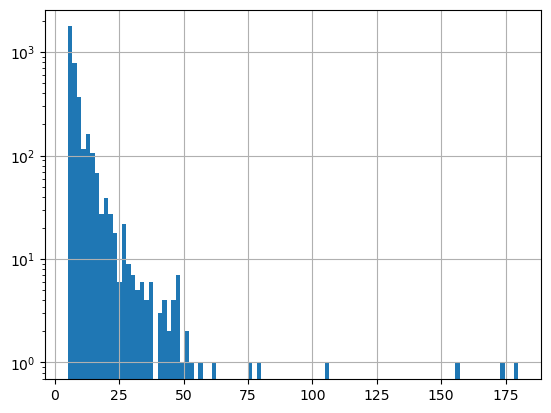

In [62]:
interested_c['count'].hist(bins=100, log=True)

In [18]:
interested_c = interested_c[interested_c['count'] >= 5]
len(interested_c)

3591

In [19]:
pvt = interested_c.pivot_table(index='visitorid', columns='itemid', values='count').fillna(0)
pvt

itemid,572,869,1022,1152,1171,1489,1605,1891,2317,2416,...,465333,465522,465616,465751,465951,466109,466259,466376,466385,466614
visitorid,,,,,,,,,,,,,,,,,,,,,
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
corr = pvt.corr()

In [21]:
target = 465522
corr[corr[target] > 0].sort_values(target, ascending=False)[[target]].head()

itemid,465522
itemid,
465522,1.0


# 판매율 기준으로 
- 판매율 : 아이템별 결제 / 뷰

In [22]:
t_items = df[df['event'] == 'transaction'].groupby(['itemid']).agg({'count':'sum'}).reset_index() # 결제가 있는 아이템 리스트

In [23]:
item_set = set(t_items['itemid'])

In [24]:
i_df = df[df['itemid'].isin(item_set)]
i_df

,year,month,day,hour,visitorid,event,itemid,transactionid,count
1,2015,6,2,14,992329,view,248676,NaN,1
4,2015,6,2,14,951259,view,367447,NaN,1
6,2015,6,2,14,810725,view,443030,NaN,1
7,2015,6,2,14,794181,view,439202,NaN,1
10,2015,6,2,14,176446,view,10572,NaN,1
...,...,...,...,...,...,...,...,...,...
2756086,2015,8,1,12,887677,view,415160,NaN,1
2756087,2015,8,1,11,611270,view,432925,NaN,1
2756088,2015,8,1,12,831605,view,57810,NaN,1
2756090,2015,8,1,12,804736,addtocart,346534,NaN,1


In [63]:
view_table = df[df['event'] == 'view'].groupby(['itemid', 'visitorid']).agg({'count':'sum'}).reset_index()
transaction_table = df[df['event'] == 'transaction'].groupby(['itemid', 'visitorid', 'transactionid']).agg({'count':'sum'}).reset_index()
addcart_tabel = df[df['event'] == 'addtocart'].groupby(['itemid', 'visitorid']).agg({'count':'sum'}).reset_index()

In [64]:
view_table.columns = ['itemid', 'visitorid', 'view_count']
transaction_table.columns = ['itemid', 'visitorid', 'transactionid', 't_count']
addcart_tabel.columns = ['itemid', 'visitorid', 'a_count']

In [66]:
merged = pd.merge(view_table, addcart_tabel)
item_t = pd.merge(merged, transaction_table)
item_t 

,itemid,visitorid,view_count,a_count,transactionid,t_count
0,15,1124964,4,2,7368.0,1
1,25,456617,2,1,9163.0,1
2,42,432404,4,1,15041.0,1
3,147,582525,9,4,1794.0,1
4,147,582525,9,4,11742.0,1
...,...,...,...,...,...,...
18249,466603,198270,2,1,3859.0,1
18250,466614,270876,1,1,3966.0,1
18251,466614,836635,6,1,3875.0,1
18252,466710,441506,1,1,5555.0,1


In [50]:
item_t['t_score'] = 1 - (item_t['t_count'] / item_t['view_count'])
item_t['wish_score'] = (item_t['a_count'] - item_t['t_count']) / item_t['view_count']
# item_t_score = item_t[['itemid', 't_score']]
item_t_score = item_t

In [52]:
item_t_score.sort_values('wish_score', ascending=False)

,itemid,visitorid,view_count,t_count,a_count,t_score,wish_score
6595,184011,6958,1,1,26,0.000000,25.000000
6718,187200,6958,1,1,20,0.000000,19.000000
12495,339822,6958,3,1,24,0.666667,7.666667
13173,357859,339526,1,1,8,0.000000,7.000000
8154,224979,802676,1,1,8,0.000000,7.000000
...,...,...,...,...,...,...,...
2688,73852,866191,1,2,1,-1.000000,-1.000000
8744,240708,1134975,1,2,1,-1.000000,-1.000000
12041,325772,852251,2,4,1,-1.000000,-1.500000
15769,428891,518659,1,3,1,-2.000000,-2.000000


In [30]:
pvt = item_t_score[item_t_score['t_score']>0].pivot_table(index='visitorid', columns='itemid', values='t_score').fillna(0)
pvt

itemid,15,25,42,147,387,496,546,572,651,655,...,466161,466259,466263,466301,466319,466321,466464,466526,466603,466614
visitorid,,,,,,,,,,,,,,,,,,,,,
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
corr = pvt.corr()
corr

itemid,15,25,42,147,387,496,546,572,651,655,...,466161,466259,466263,466301,466319,466321,466464,466526,466603,466614
itemid,,,,,,,,,,,,,,,,,,,,,
15,1.000000,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000534,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137
25,-0.000137,1.000000,-0.000137,-0.000137,-0.000137,-0.000137,-0.000534,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137
42,-0.000137,-0.000137,1.000000,-0.000137,-0.000137,-0.000137,-0.000534,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137
147,-0.000137,-0.000137,-0.000137,1.000000,-0.000137,-0.000137,-0.000534,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137
387,-0.000137,-0.000137,-0.000137,-0.000137,1.000000,-0.000137,0.295569,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466321,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000534,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,1.000000,-0.000137,-0.000137,-0.000137,-0.000137
466464,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,0.310374,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,1.000000,-0.000137,-0.000137,-0.000137
466526,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000534,-0.000137,-0.000137,-0.000137,...,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,-0.000137,1.000000,-0.000137,-0.000137


In [42]:
target = 466259
corr.sort_values(target, ascending=False)[[target]].head()

itemid,466259
itemid,
388338,1.0
285608,1.0
8588,1.0
212412,1.0
125780,1.0


In [32]:
ts_df = pd.merge(uf_df, item_t_score, on='itemid', how='left', )
ts_df = ts_df[~ts_df['t_score'].isna()]

In [56]:
df[df['itemid'] == 184011][df['visitorid'] == 6958]	

C:\Users\user\AppData\Local\Temp\ipykernel_7392\2513297668.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['itemid'] == 184011][df['visitorid'] == 6958]


,year,month,day,hour,visitorid,event,itemid,transactionid,count
2230341,2015,7,10,10,6958,transaction,184011,15078.0,1
2230774,2015,7,10,9,6958,addtocart,184011,NaN,1
2230787,2015,7,10,9,6958,addtocart,184011,NaN,1
2230797,2015,7,10,9,6958,addtocart,184011,NaN,1
2230849,2015,7,10,9,6958,addtocart,184011,NaN,1
2230880,2015,7,10,9,6958,addtocart,184011,NaN,1
2234858,2015,7,10,9,6958,addtocart,184011,NaN,1
2234873,2015,7,10,9,6958,addtocart,184011,NaN,1
2234885,2015,7,10,9,6958,addtocart,184011,NaN,1
2234912,2015,7,10,9,6958,view,184011,NaN,1


### 강사님 풀이
1. 연결고리를 만들어보자
2. 이벤트에서 가중치를 줘서 고객이 아이템에 대한 관심도 점수를 만듦
   - 뷰는 1점 , 카트는 2점, 결제는 3점으로 줌 -> 과정이 있느냐에 따라 점수를 주고 레이팅으로 활용
3. 고객과 상품의 관계 : 관심의 정도를 수치로
   - 눈길도 안줌 -> 연결고리 없음
   - 고객이 클릭함 -> 상품에 관심이 있음
   - 장바구니 -> 구매 의사가 있음
   - 결제 -> 구매완료
  
4. 점수를 주고 로우에 점수 컬럼인 intention을 만들고 그룹으로 더함


#### 고객이 구매하기까지으 ㅣ경로는 어떠할까?
- heavy user 추적

- 

In [68]:
df[df['visitorid'] == 599528]	

,timestamp,visitorid,event,itemid,transactionid
112,1433221941632,599528,addtocart,356475,NaN
130,1433222276276,599528,transaction,356475,4000.0
16729,1433221896102,599528,view,356475,NaN
29505,1433297545235,599528,view,356475,NaN
114163,1433625010602,599528,view,356475,NaN
145498,1433731497480,599528,view,356475,NaN
171995,1433896477794,599528,view,356475,NaN
187497,1433896449376,599528,view,356475,NaN
192471,1433960567121,599528,view,356475,NaN
197272,1433960259198,599528,view,356475,NaN
